# 1. Obtain the ridge parameter k for wine-quality data using ridge trace
# 2. Obtain the ridge parameter using the formula $p=\frac{p\hat{\sigma^2}}{\hat\beta^T\beta}$
# 3. Which one of the above methods gives better results?

# Part 1 : Ridge parameter using the formula  $p=\frac{p\hat{\sigma^2}}{\hat\beta^T\beta}$

#  Data Preperation 

In [1]:
import pandas as pd
df=pd.read_csv('wine-quality.csv') # reading of the data
X=df.iloc[:,1:] # seperated the regressor columns
y=df.iloc[:,0] # slicing of response column
n=X.shape[0]  # number of items in the sample
p=X.shape[1]+1 # p=number of parameters = number of regressors +1
#print(n,p)

# Computing $\hat\beta$

In [2]:
import statsmodels.api as sm
y=df.iloc[:,0] # slicing of response column
X=sm.add_constant(X) # catenating a column of ones with regressor columns
model=sm.OLS(y,X).fit()
be_hat=model.params
print ('Estimated values', model.params)

Estimated values const   -12.208427
x1       -0.845773
x2        7.418389
x3        0.010458
x4       -1.947320
x5        2.785228
x6        0.676123
x7        2.109105
x8      -11.425166
x9       -0.108023
x10       0.042182
dtype: float64


# Denominator calculation

In [3]:
import numpy as np
denom=np.dot(np.transpose(be_hat),be_hat)

# Numerator Calculation

In [4]:
t1=np.dot(np.transpose(y),y) # first term
temp=np.dot(np.transpose(be_hat),np.transpose(X)) # computed the product of behattranspose and xtranspose
t2=np.dot(temp,y) # second term
SSRES=(t1-t2)
MSRES=SSRES/(n-p)
numerator=p*MSRES


# Ridge Parameter Calculation

In [5]:
k=numerator/denom
k

0.046988276944126356

# Ridge Estimation

In [6]:
XTrX=np.dot(np.transpose(X),X)
kI=k*np.identity(11)

In [7]:
import numpy.linalg as mat
factor1=mat.inv(XTrX+kI)
factor2=np.dot(np.transpose(X),y)
b_ridge=np.dot(factor1,factor2)
print('Ridge Estimators')
print(b_ridge)

Ridge Estimators
[-1.48435209e+00 -8.68330791e-01  4.00448931e+00  4.57627762e-03
 -8.70314864e-01  1.43333357e+00  2.31832166e-01  1.20150141e+00
 -4.67473593e+00 -2.79234183e-03  2.40300281e-02]


# Assessing ridge estimation using Mean Square Error

In [8]:
y_ridge=np.dot(X,b_ridge)
print("Ridge Predicted values",y_ridge)

Ridge Predicted values [17.06297814 17.62783539 17.40176836 18.0532386  16.35095188 17.32917708
 14.98733124 15.76642788 14.92563074 13.54252636 14.32996839 14.06092631
 13.78775278 14.40243265 16.2595175  16.71852924 15.8116013  15.47737805
 16.47975488 15.3742912  16.3777915  13.91564594 16.15832603 14.57419188
 15.18743145 14.15776218 14.07485583 12.87402697 15.22878276 15.03432322
 14.22312134 13.7134701 ]


In [9]:
mse=sum((y-y_ridge)*(y-y_ridge))/n
print("Empirical Ridge MSE",mse)

Empirical Ridge MSE 1.0819152354802257


# Part 2 :  Creating Ridge Trace

In [10]:
X=df.iloc[:,1:] # seperated the regressor columns
y=df.iloc[:,0] # slicing of response column

# Creating 25 k-values in logarithmic scaling

In [11]:
import numpy as np
n_k=25
ks=np.logspace(0,3,n_k)/10
ks

array([  0.1       ,   0.13335214,   0.17782794,   0.23713737,
         0.31622777,   0.4216965 ,   0.56234133,   0.74989421,
         1.        ,   1.33352143,   1.77827941,   2.37137371,
         3.16227766,   4.21696503,   5.62341325,   7.49894209,
        10.        ,  13.33521432,  17.7827941 ,  23.71373706,
        31.6227766 ,  42.16965034,  56.23413252,  74.98942093,
       100.        ])

# For obtaining ridge coefficient for different values of k

In [12]:
from sklearn import linear_model
ridge_b=[]
for k in ks:
    model=linear_model.Ridge(alpha=k,fit_intercept=True)
    model.fit(X,y)
    ridge_b.append(model.coef_)
ridge_b

[array([-0.94699432,  4.32603137,  0.00568929, -0.58951834,  1.00944302,
         0.07456964,  0.93487338, -2.41051445,  0.06561241,  0.01869747]),
 array([-9.32112082e-01,  3.76224540e+00,  4.78331498e-03, -4.34114326e-01,
         8.39144015e-01,  1.03935708e-03,  8.38104658e-01, -1.93321357e+00,
         6.83460467e-02,  1.67620932e-02]),
 array([-0.91203068,  3.20417434,  0.00385248, -0.29820897,  0.69395053,
        -0.05745587,  0.7514064 , -1.53193359,  0.06885697,  0.01502813]),
 array([-0.88746276,  2.67383739,  0.00293443, -0.18466767,  0.57586738,
        -0.09925481,  0.67512218, -1.20051937,  0.06770407,  0.01350244]),
 array([-8.59168463e-01,  2.18872083e+00,  2.06394596e-03, -9.33284014e-02,
         4.83603554e-01, -1.24908534e-01,  6.08512088e-01, -9.31130948e-01,
         6.54842283e-02,  1.21702418e-02]),
 array([-8.27732325e-01,  1.76019179e+00,  1.26779630e-03, -2.18283779e-02,
         4.13624534e-01, -1.36438216e-01,  5.50062750e-01, -7.15309477e-01,
         6.2

# Creating a ridge trace

In [13]:
rdg_arr=np.array(ridge_b) # list is converted into a 2-d array
rdg_arr=rdg_arr.reshape((n_k,10))
rdg_arr.shape

(25, 10)

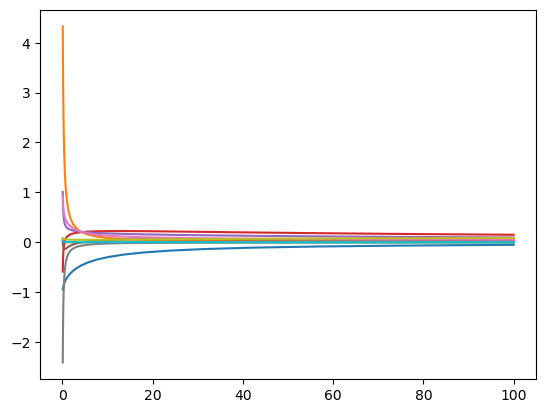

In [14]:
import matplotlib.pyplot as plt
plt.plot(ks,rdg_arr)
plt.show()

# Recommend a value close to k=4

In [15]:
model=linear_model.Ridge(alpha=4,fit_intercept=True)
model.fit(X,y)

Ridge(alpha=4)

In [16]:
y_trace=model.predict(X)

In [17]:
mse=sum((y-y_trace)*(y-y_trace))/n
print("Empirical Ridge MSE",mse)

Empirical Ridge MSE 1.368818017588188


# Formula gives a smaller mean square error than the Ridge parameter k=4